In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from pathlib import Path
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Add project root to path for imports
sys.path.append(str(Path(os.getcwd()).parent.parent))
from inputs.eseed_task import EseedTask, get_eseed_tasks
from features.temporal import TemporalPupilFeatureExtractor

Using slow nslr


In [2]:
# Define the path to the pupil.csv file
pupil_csv_path = Path("../../data/eseed/participant_01/video_01/pupil.csv")

# Load the CSV into a DataFrame
df = pd.read_csv(pupil_csv_path)

# Show the first few rows
df.head()

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_y,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle
0,6757.269833,0,0,0.999748,0.364537280645399,0.376215,38.644272,3d c++,69.991158,119.766744,...,0.139621,-0.743967,2.061790,1.710875,-2.291523,132.075202,102.329096,173.280682,173.280682,90.0
1,6757.269833,0,0,1.000000,0.364535411198934,0.376207,38.646702,2d c++,69.990799,119.768265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6757.270004,0,1,1.000000,0.415447354316711,0.686153,39.105587,2d c++,79.765892,60.258575,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6757.270004,0,1,0.998717,0.415437503215413,0.685923,39.080988,3d c++,79.764001,60.302831,...,-0.119095,-0.702393,1.698411,1.451418,-2.355740,155.234184,81.527923,204.660484,204.660484,90.0
4,6757.273027,0,0,0.999725,0.36414929085637,0.375576,38.551324,3d c++,69.916664,119.889346,...,0.140787,-0.743117,2.057506,1.712053,-2.292633,132.075202,102.329096,173.280682,173.280682,90.0


In [3]:
# Load all ESEED tasks
tasks = get_eseed_tasks(max_participants=48, max_videos=10, verbose=False)

# Initialize the extractor
extractor = TemporalPupilFeatureExtractor()

# Extract features for all tasks
X = []
for task in tasks:
    features = extractor(task)
    # Stack lpd and rpd as columns: shape (timesteps, 2)
    X.append(np.stack([features['lpd'], features['rpd']], axis=1))

# Optionally convert to numpy array (object dtype for ragged arrays)
X = np.array(X, dtype=object)

print("Number of sequences:", len(X))
print("All sequence shapes:", [x.shape for x in X])

Number of sequences: 480
All sequence shapes: [(2967, 2), (8251, 2), (4286, 2), (8994, 2), (7793, 2), (1222, 2), (1122, 2), (11448, 2), (4596, 2), (5860, 2), (9806, 2), (8242, 2), (4264, 2), (8964, 2), (8473, 2), (13881, 2), (6668, 2), (11599, 2), (4604, 2), (8235, 2), (9651, 2), (8092, 2), (4234, 2), (8873, 2), (8237, 2), (13448, 2), (6554, 2), (11341, 2), (4429, 2), (8054, 2), (5181, 2), (8259, 2), (4123, 2), (8819, 2), (8374, 2), (752, 2), (6697, 2), (11555, 2), (4560, 2), (8164, 2), (9990, 2), (8395, 2), (4305, 2), (8993, 2), (8447, 2), (13751, 2), (6526, 2), (11803, 2), (4605, 2), (8439, 2), (10018, 2), (8386, 2), (4325, 2), (9046, 2), (8562, 2), (14147, 2), (6846, 2), (11797, 2), (4716, 2), (8295, 2), (10186, 2), (8466, 2), (4238, 2), (8791, 2), (8286, 2), (13732, 2), (6729, 2), (11765, 2), (4606, 2), (8334, 2), (9673, 2), (8300, 2), (4189, 2), (8804, 2), (8306, 2), (13800, 2), (6816, 2), (11987, 2), (4645, 2), (8237, 2), (9856, 2), (8356, 2), (4271, 2), (8921, 2), (8254, 2), (13

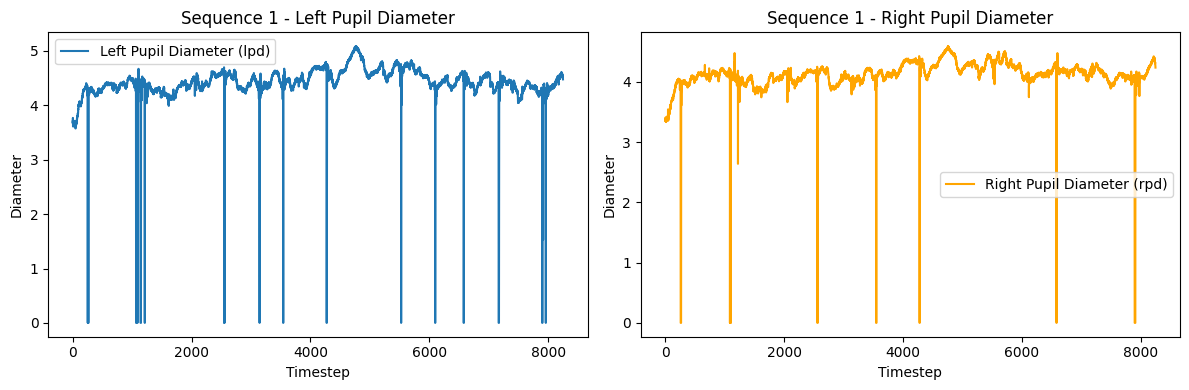

In [4]:
seq_idx = 1
sequence = X[seq_idx]

# Plot left and right pupil diameter side by side
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(sequence[:, 0], label='Left Pupil Diameter (lpd)')
plt.title(f'Sequence {seq_idx} - Left Pupil Diameter')
plt.xlabel('Timestep')
plt.ylabel('Diameter')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sequence[:, 1], label='Right Pupil Diameter (rpd)', color='orange')
plt.title(f'Sequence {seq_idx} - Right Pupil Diameter')
plt.xlabel('Timestep')
plt.ylabel('Diameter')
plt.legend()

plt.tight_layout()
plt.show()

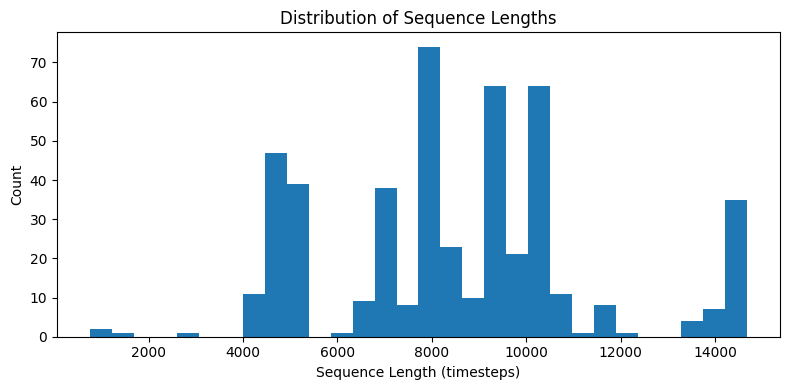

In [5]:
sequence_lengths = [seq.shape[0] for seq in X]

plt.figure(figsize=(8, 4))
plt.hist(sequence_lengths, bins=30)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length (timesteps)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()